In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing


In [2]:
# importing data
df = pd.read_csv(r'C:\Users\cheth\OneDrive\Desktop\ExcelR\Assignments\decision tree\Company_Data.csv')

In [3]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
bins = [-1,6,12,18]
Sales_Cat = ['Low','Medium','High']
df['Sales_Cat'] = pd.cut(df["Sales"],bins,labels = Sales_Cat)

In [5]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Cat
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,Medium
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,Medium
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,Medium
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Medium
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low


In [6]:
first_column = df.pop('Sales_Cat')

In [7]:
df.insert(0, 'Sales_Cat', first_column)

In [8]:
data=df.drop('Sales',axis=1)

In [9]:
#Complete Iris dataset
label_encoder = preprocessing.LabelEncoder()
data['Sales_Cat']= label_encoder.fit_transform(data['Sales_Cat']) 

In [10]:
#Complete data encoding for categorical data
data_encoded=pd.get_dummies(data)

In [11]:
data_encoded.head()

,Sales_Cat,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,2,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,2,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,2,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,2,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,1,141,64,3,340,128,38,13,1,0,0,0,1,1,0


In [12]:
x=data_encoded.iloc[:,1:]
y=data_encoded['Sales_Cat']


In [13]:
x

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [14]:
data['Sales_Cat'].unique()

array([2, 1, 0])

In [15]:
data.Sales_Cat.value_counts()

2    243
1    130
0     27
Name: Sales_Cat, dtype: int64

In [16]:
colnames = list(x.columns)
colnames

['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'Age',
 'Education',
 'ShelveLoc_Bad',
 'ShelveLoc_Good',
 'ShelveLoc_Medium',
 'Urban_No',
 'Urban_Yes',
 'US_No',
 'US_Yes']

In [17]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

### Building Decision Tree Classifier using Entropy Criteria

In [18]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

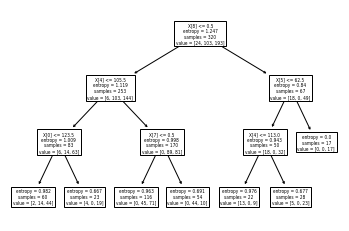

In [19]:
#PLot the decision tree
tree.plot_tree(model);

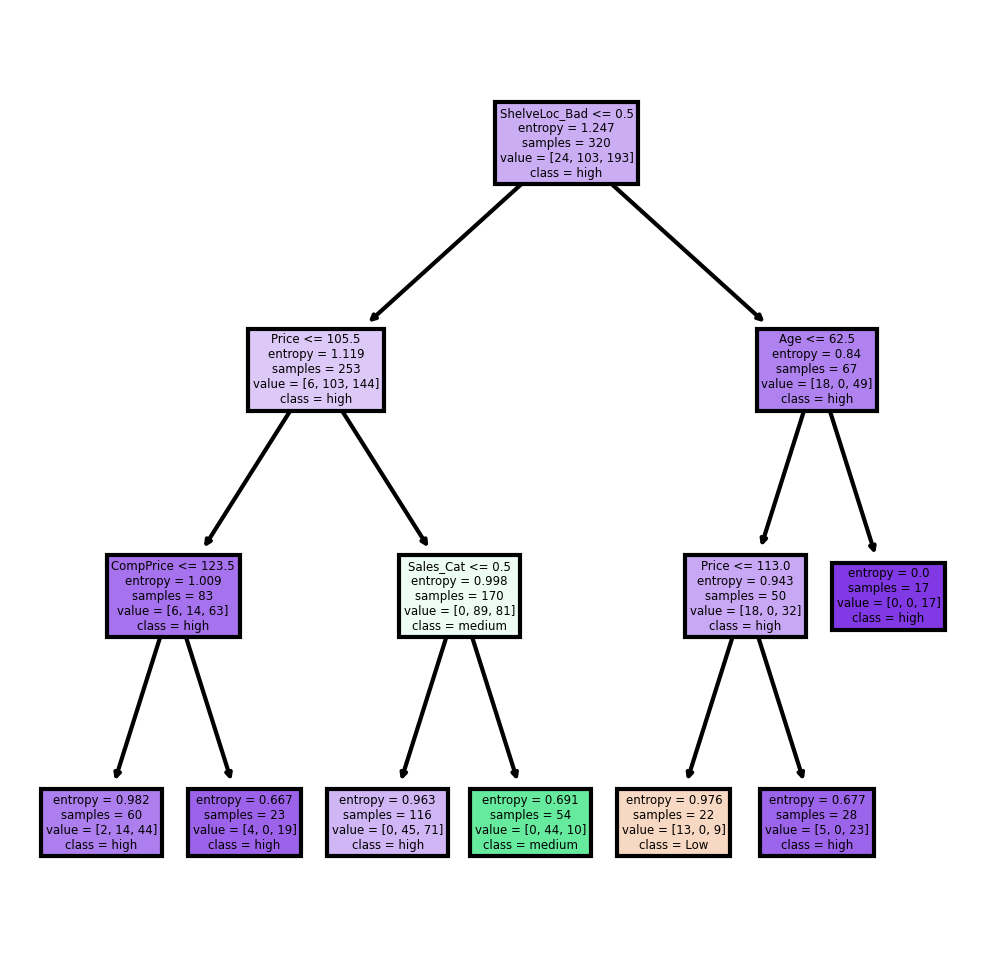

In [20]:
fn=['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'Age',
 'Education',
 'Sales_Cat',
 'ShelveLoc_Bad',
 'ShelveLoc_Good',
 'ShelveLoc_Medium',
 'Urban_No',
 'Urban_Yes',
 'US_No',
 'US_Yes']
cn=['Low', 'medium', 'high']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,feature_names = fn,class_names=cn,filled = True);
#tree.plot_tree(model,feature_names = fn,filled = True);
#tree.plot_tree(model,filled = True);

In [21]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

2    69
1     7
0     4
dtype: int64

In [22]:
preds

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 1, 2, 0, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2,
       2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [23]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1,2
Sales_Cat,,,
0,2,0,1
1,0,5,22
2,2,2,46


In [24]:
# Accuracy 
np.mean(preds==y_test)

0.6625

### Building Decision Tree Classifier (CART) using Gini Criteria

In [25]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [26]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [27]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.6625

#### Decision Tree Regression Example

In [28]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [29]:
array = data.values
X = array[:,0:3]
y = array[:,3]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [31]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [32]:
#Find the accuracy
model.score(X_test,y_test)

-1.2015801216418596